<a href="https://colab.research.google.com/github/julidoominguez/SeriesdeTiempoAustral/blob/main/TP2_Vitalcer_AUTOML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install AutoTS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.0/851.0 kB 10.5 MB/s eta 0:00:00


In [ ]:
pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
pip install pycaret


In [ ]:
import pandas as pd
from pycaret.regression import setup, compare_models, tune_model, evaluate_model, save_model

In [ ]:
import numpy as np
import pandas as pd
from autots import AutoTS
import matplotlib.pyplot as plt

In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1OVJRz3bjcKnrTl62DdEbvJTrMlDYCLFmRILtqNJgTvs/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
df_vitalcer = pd.read_csv(csv_url)

In [ ]:
display(df_vitalcer)

,fecha,Monto_deflactado,dieta,RH2M,sube,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,...,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros,Visitas pagina,Alcance IG
0,2019-11-15 0:00:00,"595695,0318",62,"66,94",3867,"49574,33","239,44","243,4","246,54","238,13",...,"7985919,656","8877286,117","2838731,673","883049,9169","11316019,27","2197595,469","4638017,913","7726583,681",NaN,NaN
1,2019-11-16 0:00:00,"460448,313",60,"75,19",3867,"49574,33","239,44","243,4","246,54","238,13",...,"7985919,656","8877286,117","2838731,673","883049,9169","11316019,27","2197595,469","4638017,913","7726583,681",NaN,NaN
2,2019-11-17 0:00:00,0,0,0,3867,"49574,33","239,44","243,4","246,54","238,13",...,"7985919,656","8877286,117","2838731,673","883049,9169","11316019,27","2197595,469","4638017,913","7726583,681",NaN,NaN
3,2019-11-18 0:00:00,0,0,0,3867,"49574,33","239,44","243,4","246,54","238,13",...,"7985919,656","8877286,117","2838731,673","883049,9169","11316019,27","2197595,469","4638017,913","7726583,681",NaN,NaN
4,2019-11-19 0:00:00,"606252,4772",88,"73,75",3867,"49574,33","239,44","243,4","246,54","238,13",...,"7985919,656","8877286,117","2838731,673","883049,9169","11316019,27","2197595,469","4638017,913","7726583,681",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,2024-06-23 0:00:00,0,0,0,7952,"879483,08","4077,32","4490,03","4807,34","3957,89",...,"170075429,1","153950342,7","60571949,32","13628091,52","207457595,6","34292093,85","65096403,31","85587417,6",10.0,4.0
1683,2024-06-24 0:00:00,758690,64,"81,62",29191,"879483,08","4077,32","4490,03","4807,34","3957,89",...,"170075429,1","153950342,7","60571949,32","13628091,52","207457595,6","34292093,85","65096403,31","85587417,6",26.0,12.0
1684,2024-06-25 0:00:00,614865,64,"85,44",28699,"879483,08","4077,32","4490,03","4807,34","3957,89",...,"170075429,1","153950342,7","60571949,32","13628091,52","207457595,6","34292093,85","65096403,31","85587417,6",25.0,15.0
1685,2024-06-26 0:00:00,765132,66,"82,25",29018,"879483,08","4077,32","4490,03","4807,34","3957,89",...,"170075429,1","153950342,7","60571949,32","13628091,52","207457595,6","34292093,85","65096403,31","85587417,6",32.0,13.0


In [ ]:
# Convertir la columna 'fecha' a datetime y establecerla como índice
df_vitalcer['fecha'] = pd.to_datetime(df_vitalcer['fecha'])
df_vitalcer.set_index('fecha', inplace=True)

In [ ]:
# Convertir todas las columnas excepto el índice a tipo numérico
for col in df_vitalcer.columns:
    if df_vitalcer[col].dtype == 'object':
        df_vitalcer[col] = df_vitalcer[col].str.replace(',', '.')
        df_vitalcer[col] = pd.to_numeric(df_vitalcer[col], errors='coerce')

In [ ]:
print(df_vitalcer.dtypes)

Monto_deflactado                                float64
dieta                                             int64
RH2M                                            float64
sube                                            float64
ripte                                           float64
indice_salarios                                 float64
indice_salarios_registrado                      float64
indice_salarios_registrado_sector_privado       float64
indice_salarios_registrado_sector_publico       float64
indice_salarios_no_registrado_sector_privado    float64
indice_gran_buenos_aires                        float64
comercio_mayorista_minorista_reparaciones       float64
Ventas Minoristas                               float64
ventas_precios_corrientes                       float64
ventas_precios_constantes                       float64
ventas_totales_canal_venta                      float64
salon_ventas                                    float64
canales_on_line                                 

In [ ]:
display(df_vitalcer)

,Monto_deflactado,dieta,RH2M,sube,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,indice_salarios_no_registrado_sector_privado,...,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros,Visitas pagina,Alcance IG
fecha,,,,,,,,,,,,,,,,,,,,,
2019-11-15,595695.0318,62,66.94,3867.0,49574.33,239.44,243.40,246.54,238.13,223.54,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
2019-11-16,460448.3130,60,75.19,3867.0,49574.33,239.44,243.40,246.54,238.13,223.54,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
2019-11-17,0.0000,0,0.00,3867.0,49574.33,239.44,243.40,246.54,238.13,223.54,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
2019-11-18,0.0000,0,0.00,3867.0,49574.33,239.44,243.40,246.54,238.13,223.54,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
2019-11-19,606252.4772,88,73.75,3867.0,49574.33,239.44,243.40,246.54,238.13,223.54,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,0.0000,0,0.00,7952.0,879483.08,4077.32,4490.03,4807.34,3957.89,2419.24,...,1.700754e+08,1.539503e+08,6.057195e+07,1.362809e+07,2.074576e+08,3.429209e+07,6.509640e+07,8.558742e+07,10.0,4.0
2024-06-24,758690.0000,64,81.62,29191.0,879483.08,4077.32,4490.03,4807.34,3957.89,2419.24,...,1.700754e+08,1.539503e+08,6.057195e+07,1.362809e+07,2.074576e+08,3.429209e+07,6.509640e+07,8.558742e+07,26.0,12.0
2024-06-25,614865.0000,64,85.44,28699.0,879483.08,4077.32,4490.03,4807.34,3957.89,2419.24,...,1.700754e+08,1.539503e+08,6.057195e+07,1.362809e+07,2.074576e+08,3.429209e+07,6.509640e+07,8.558742e+07,25.0,15.0


In [ ]:
# Imputar valores nulos en las columnas 'Visitas pagina' y 'Alcance IG' con 0
df_vitalcer['Visitas pagina'].fillna(0, inplace=True)
df_vitalcer['Alcance IG'].fillna(0, inplace=True)

In [ ]:
# Inicializar PyCaret
regression_setup = setup(data=df_vitalcer,
                         target='Monto_deflactado',
                         session_id=123, # Para reproducibilidad
                         normalize=True, # Normalizar los datos
                         feature_selection=True, # Seleccionar las mejores características
                         remove_multicollinearity=True, # Eliminar la multicolinealidad
                         multicollinearity_threshold=0.9) # Umbral para la multicolinealidad

# Comparar todos los modelos disponibles
best_model = compare_models()




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1704
[LightGBM] [Info] Number of data points in the train set: 1180, number of used features: 10
[LightGBM] [Info] Start training from score 558648.672787


,Description,Value
0,Session id,123
1,Target,Monto_deflactado
2,Target type,Regression
3,Original data shape,"(1687, 38)"
4,Transformed data shape,"(1687, 8)"
5,Transformed train set shape,"(1180, 8)"
6,Transformed test set shape,"(507, 8)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,96450.9402,19326654022.1838,138371.2868,0.7910,0.3019,0.2166,1.0030
gbr,Gradient Boosting Regressor,99013.3489,19658636365.0152,139549.2871,0.7874,3.9470,0.2176,0.4510
et,Extra Trees Regressor,98235.0379,19724321091.2209,139772.0231,0.7867,0.3091,0.2190,0.4320
lightgbm,Light Gradient Boosting Machine,100845.2148,20211510739.4449,141423.7988,0.7811,3.7325,0.2204,0.5500
knn,K Neighbors Regressor,99660.9750,20329182720.0000,142108.7094,0.7803,0.2318,0.2233,0.1600
xgboost,Extreme Gradient Boosting,104551.1539,21595829657.6000,146405.1383,0.7666,3.7905,0.2279,0.3050
ada,AdaBoost Regressor,106337.8944,22523604505.4850,149587.7352,0.7562,0.2481,0.2482,0.3790
br,Bayesian Ridge,120482.6023,27026889113.6000,163900.8016,0.7072,4.3747,0.2484,0.1520
llar,Lasso Least Angle Regression,120329.1688,27029928345.6000,163907.1266,0.7072,4.3585,0.2485,0.2550
lar,Least Angle Regression,120329.1250,27029998592.0000,163907.3438,0.7072,4.3585,0.2485,0.2900


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Afinar el mejor modelo
tuned_model = tune_model(best_model)

# Evaluar el modelo ajustado
evaluate_model(tuned_model)

# Guardar el modelo ajustado
save_model(tuned_model, 'mejor_modelo_vitalcer')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98698.7584,18715783265.1521,136805.6405,0.8052,2.9591,0.1981
1,98275.7215,21398241412.6234,146281.3775,0.7661,2.6263,0.1652
2,102989.9967,24901831260.8104,157803.1408,0.7595,3.2079,0.4875
3,84951.8273,16908558659.7716,130032.9138,0.8213,3.5030,0.2022
4,92994.6079,15303339590.8235,123706.6675,0.8342,2.7860,0.1916
5,78798.0259,11822599984.3018,108731.7800,0.8663,3.2430,0.1516
6,111670.4063,24531536846.9096,156625.4668,0.7122,1.9992,0.2069
7,97161.9673,19431059389.8159,139395.3349,0.7813,3.0166,0.1863
8,94870.5298,17526732395.5377,132388.5660,0.8030,2.9852,0.1814


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['dieta', 'RH2M', 'sube', 'ripte',
                                              'indice_salarios',
                                              'indice_salarios_registrado',
                                              'indice_salarios_registrado_sector_privado',
                                              'indice_salarios_registrado_sector_publico',
                                              'indice_salarios_no_registrado_sector_privado',
                                              'indice_gran_buenos_aires',
                                              'comercio_mayoris...
                                     transformer=SelectFromModel(estimator=LGBMRegressor(),
                                                                 max_features=7,
                                                                 threshold=-inf))),
                 ('clean_c

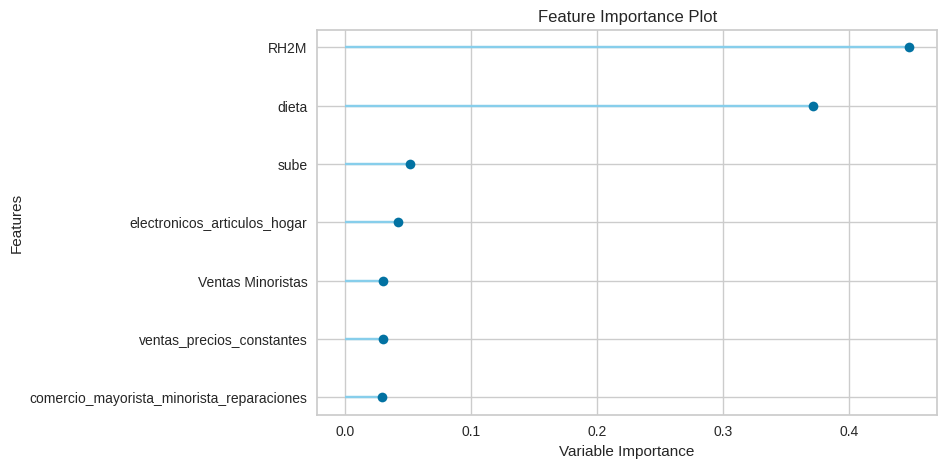

In [ ]:
from pycaret.regression import *
# Visualizar la importancia de las características
plot_model(best_model, plot='feature')

### Solo modelos que tengan feature importance (para ver la importancia de las variables)

In [ ]:
# Inicializar PyCaret
regression_setup = setup(data=df_vitalcer,
                         target='Monto_deflactado',
                         session_id=123, # Para reproducibilidad
                         normalize=True, # Normalizar los datos
                         feature_selection=True, # Seleccionar las mejores características
                         remove_multicollinearity=True, # Eliminar la multicolinealidad
                         multicollinearity_threshold=0.9) # Umbral para la multicolinealidad

# Comparar modelos específicos que soportan importancia de características
best_model = compare_models(include=['rf', 'et', 'gbr', 'xgboost', 'lightgbm'])


,Description,Value
0,Session id,123
1,Target,Monto_deflactado
2,Target type,Regression
3,Original data shape,"(1687, 38)"
4,Transformed data shape,"(1687, 8)"
5,Transformed train set shape,"(1180, 8)"
6,Transformed test set shape,"(507, 8)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,96450.9402,19326654022.1838,138371.2868,0.7910,0.3019,0.2166,1.7620
gbr,Gradient Boosting Regressor,99013.3489,19658636365.0152,139549.2871,0.7874,3.9470,0.2176,0.6410
et,Extra Trees Regressor,98235.0379,19724321091.2209,139772.0231,0.7867,0.3091,0.2190,0.4490
lightgbm,Light Gradient Boosting Machine,100845.2148,20211510739.4449,141423.7988,0.7811,3.7325,0.2204,0.4870
xgboost,Extreme Gradient Boosting,104551.1539,21595829657.6000,146405.1383,0.7666,3.7905,0.2279,0.3160


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,96450.9402,19326654022.1838,138371.2868,0.7910,0.3019,0.2166,1.0850
gbr,Gradient Boosting Regressor,99013.3489,19658636365.0152,139549.2871,0.7874,3.9470,0.2176,0.5630
et,Extra Trees Regressor,98235.0379,19724321091.2209,139772.0231,0.7867,0.3091,0.2190,0.4340
lightgbm,Light Gradient Boosting Machine,100845.2148,20211510739.4449,141423.7988,0.7811,3.7325,0.2204,1.0470
knn,K Neighbors Regressor,99660.9750,20329182720.0000,142108.7094,0.7803,0.2318,0.2233,0.2180
xgboost,Extreme Gradient Boosting,104551.1539,21595829657.6000,146405.1383,0.7666,3.7905,0.2279,0.2990
ada,AdaBoost Regressor,106337.8944,22523604505.4850,149587.7352,0.7562,0.2481,0.2482,0.3240
br,Bayesian Ridge,120482.6023,27026889113.6000,163900.8016,0.7072,4.3747,0.2484,0.2550
llar,Lasso Least Angle Regression,120329.1688,27029928345.6000,163907.1266,0.7072,4.3585,0.2485,0.1580
lar,Least Angle Regression,120329.1250,27029998592.0000,163907.3438,0.7072,4.3585,0.2485,0.1540


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

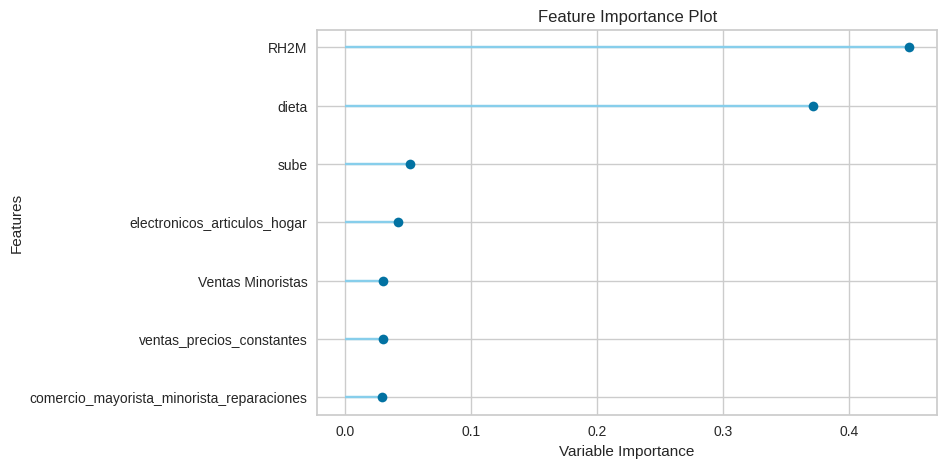

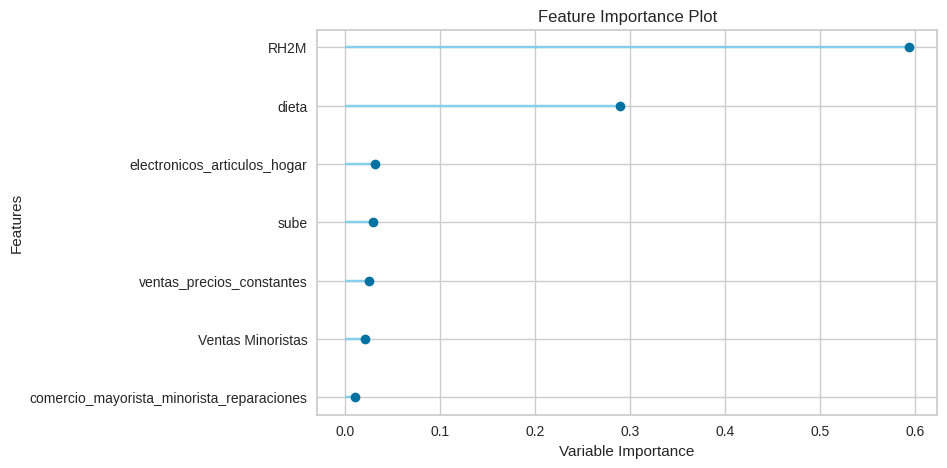

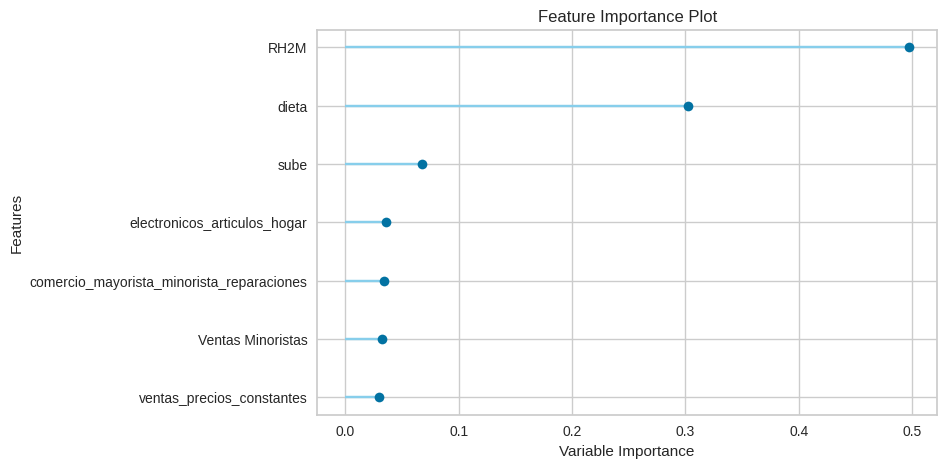

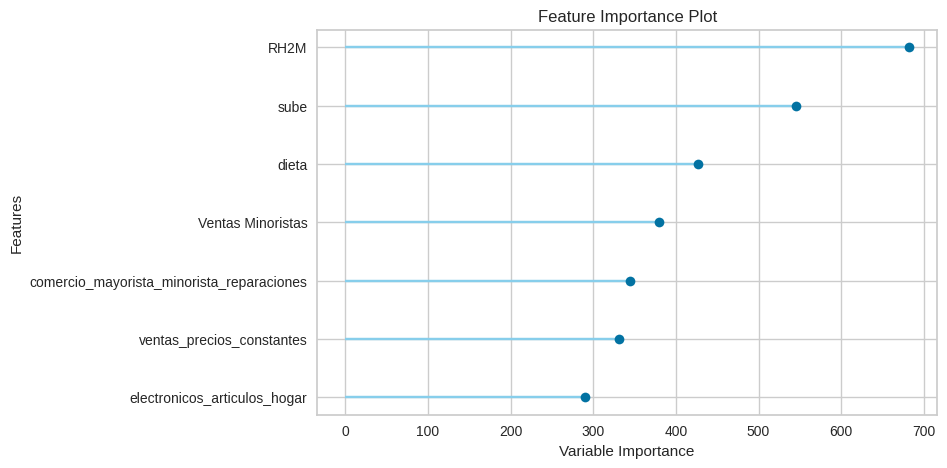

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [ ]:
# Comparar todos los modelos disponibles y seleccionar los primeros 5 modelos
best_models = compare_models(n_select=5)

# Visualizar la importancia de las características para los primeros 5 modelos
for model in best_models:
    plot_model(model, plot='feature')

In [ ]:

# Afinar el mejor modelo
tuned_model = tune_model(best_model)

# Evaluar el modelo ajustado
# Puedes omitir la evaluación que genere gráficos no soportados
try:
    evaluate_model(tuned_model)
except TypeError as e:
    print(f"Error durante la evaluación del modelo: {e}")

# Guardar el modelo ajustado
save_model(tuned_model, 'mejor_modelo_vitalcer')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98698.7584,18715783265.1521,136805.6405,0.8052,2.9591,0.1981
1,98275.7215,21398241412.6234,146281.3775,0.7661,2.6263,0.1652
2,102989.9967,24901831260.8104,157803.1408,0.7595,3.2079,0.4875
3,84951.8273,16908558659.7716,130032.9138,0.8213,3.5030,0.2022
4,92994.6079,15303339590.8235,123706.6675,0.8342,2.7860,0.1916
5,78798.0259,11822599984.3018,108731.7800,0.8663,3.2430,0.1516
6,111670.4063,24531536846.9096,156625.4668,0.7122,1.9992,0.2069
7,97161.9673,19431059389.8159,139395.3349,0.7813,3.0166,0.1863
8,94870.5298,17526732395.5377,132388.5660,0.8030,2.9852,0.1814


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['dieta', 'RH2M', 'sube', 'ripte',
                                              'indice_salarios',
                                              'indice_salarios_registrado',
                                              'indice_salarios_registrado_sector_privado',
                                              'indice_salarios_registrado_sector_publico',
                                              'indice_salarios_no_registrado_sector_privado',
                                              'indice_gran_buenos_aires',
                                              'comercio_mayoris...
                                     transformer=SelectFromModel(estimator=LGBMRegressor(),
                                                                 max_features=7,
                                                                 threshold=-inf))),
                 ('clean_c

### Ensamble de modelos

In [ ]:
import pandas as pd
from pycaret.regression import setup, compare_models, blend_models, evaluate_model, save_model, predict_model

# Inicializar PyCaret
regression_setup = setup(data=df_vitalcer,
                         target='Monto_deflactado',
                         session_id=123, # Para reproducibilidad
                         normalize=True, # Normalizar los datos
                         feature_selection=True, # Seleccionar las mejores características
                         remove_multicollinearity=True, # Eliminar la multicolinealidad
                         multicollinearity_threshold=0.9) # Umbral para la multicolinealidad

# Comparar modelos
top_models = compare_models(n_select=5)

# Crear un ensamblaje de los mejores modelos
blended_model = blend_models(estimator_list=top_models)

# Evaluar el modelo ensamblado
evaluate_model(blended_model)

# Hacer predicciones
predictions = predict_model(blended_model, data=df_vitalcer)

# Mostrar las predicciones
print(predictions)

# Guardar el modelo ensamblado
save_model(blended_model, 'modelo_ensamblado_vitalcer')



,Description,Value
0,Session id,123
1,Target,Monto_deflactado
2,Target type,Regression
3,Original data shape,"(1687, 38)"
4,Transformed data shape,"(1687, 8)"
5,Transformed train set shape,"(1180, 8)"
6,Transformed test set shape,"(507, 8)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,96450.9402,19326654022.1838,138371.2868,0.7910,0.3019,0.2166,0.7570
gbr,Gradient Boosting Regressor,99013.3489,19658636365.0152,139549.2871,0.7874,3.9470,0.2176,0.3720
et,Extra Trees Regressor,98235.0379,19724321091.2209,139772.0231,0.7867,0.3091,0.2190,0.6610
lightgbm,Light Gradient Boosting Machine,100845.2148,20211510739.4449,141423.7988,0.7811,3.7325,0.2204,2.3000
knn,K Neighbors Regressor,99660.9750,20329182720.0000,142108.7094,0.7803,0.2318,0.2233,0.2660
xgboost,Extreme Gradient Boosting,104551.1539,21595829657.6000,146405.1383,0.7666,3.7905,0.2279,0.2750
ada,AdaBoost Regressor,106337.8944,22523604505.4850,149587.7352,0.7562,0.2481,0.2482,0.2070
br,Bayesian Ridge,120482.6023,27026889113.6000,163900.8016,0.7072,4.3747,0.2484,0.1360
llar,Lasso Least Angle Regression,120329.1688,27029928345.6000,163907.1266,0.7072,4.3585,0.2485,0.1400
lar,Least Angle Regression,120329.1250,27029998592.0000,163907.3438,0.7072,4.3585,0.2485,0.1380


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,100773.5052,19385287479.0519,139231.0579,0.7982,3.5600,0.2018
1,98615.9646,20240694612.0556,142269.7952,0.7788,3.1670,0.1661
2,104370.8850,24429957444.8448,156300.8555,0.7641,3.3983,0.4871
3,84607.8188,16076472609.5255,126793.0306,0.8301,3.5713,0.1967
4,94783.5205,15669086398.0910,125176.2214,0.8303,3.5770,0.1937
5,80546.7826,12033425197.8385,109696.9699,0.8639,3.5346,0.1551
6,111097.6099,24190092179.9160,155531.6437,0.7162,2.7901,0.2030
7,95966.3017,18464660382.0293,135884.7320,0.7922,3.2622,0.1817
8,98479.8980,18835250322.7619,137241.5765,0.7883,3.3557,0.1879


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,59857.2480,7917960173.6253,88982.9207,0.9153,3.3578,0.1205


            dieta       RH2M     sube          ripte  indice_salarios  \
fecha                                                                   
2019-11-15     62  66.940002   3867.0   49574.328125       239.440002   
2019-11-16     60  75.190002   3867.0   49574.328125       239.440002   
2019-11-17      0   0.000000   3867.0   49574.328125       239.440002   
2019-11-18      0   0.000000   3867.0   49574.328125       239.440002   
2019-11-19     88  73.750000   3867.0   49574.328125       239.440002   
...           ...        ...      ...            ...              ...   
2024-06-23      0   0.000000   7952.0  879483.062500      4077.320068   
2024-06-24     64  81.620003  29191.0  879483.062500      4077.320068   
2024-06-25     64  85.440002  28699.0  879483.062500      4077.320068   
2024-06-26     66  82.250000  29018.0  879483.062500      4077.320068   
2024-06-27     62  77.059998  28542.0  879483.062500      4077.320068   

            indice_salarios_registrado  \
fecha   

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['dieta', 'RH2M', 'sube', 'ripte',
                                              'indice_salarios',
                                              'indice_salarios_registrado',
                                              'indice_salarios_registrado_sector_privado',
                                              'indice_salarios_registrado_sector_publico',
                                              'indice_salarios_no_registrado_sector_privado',
                                              'indice_gran_buenos_aires',
                                              'comercio_mayoris...
                  VotingRegressor(estimators=[('Random Forest Regressor',
                                               RandomForestRegressor(n_jobs=-1,
                                                                     random_state=123)),
                                        

### **Pycaret** time series

In [ ]:
import pandas as pd
from pycaret.time_series import setup, compare_models, tune_model
# , evaluate_model, save_model
# Inicializar PyCaret para series de tiempo
ts_setup = setup(data=df_vitalcer,
                 target='Monto_deflactado',
                 session_id=123, # Para reproducibilidad
                 seasonal_period=6,
                 ignore_features=['indice_salarios',
                                  'indice_salarios_registrado', 'indice_salarios_registrado_sector_privado',
                                  'indice_salarios_registrado_sector_publico', 'indice_salarios_no_registrado_sector_privado',
                                  'ventas_totales_canal_venta', 'salon_ventas','ventas_totales_medio_pago', 'ventas_totales_grupo_articulos'] ) # Ignorar columnas no necesarias para la predicción


,Description,Value
0,session_id,123
1,Target,Monto_deflactado
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1687, 29)"
5,Transformed data shape,"(1687, 29)"
6,Transformed train set shape,"(1686, 29)"
7,Transformed test set shape,"(1, 29)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# Comparar todos los modelos disponibles
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.1532,0.1128,48267.1242,48267.1242,0.0742,0.0701,2.0900
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.1821,0.1341,57366.4476,57366.4476,0.0913,0.0822,0.1667
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.1897,0.1397,59747.9440,59747.9440,0.0904,0.0861,0.7900
auto_arima,Auto ARIMA,0.1988,0.1464,62644.0634,62644.0634,0.0992,0.0891,32.9967
arima,ARIMA,0.1988,0.1463,62620.5760,62620.5760,0.0992,0.0890,4.5200
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.2240,0.1649,70555.1290,70555.1290,0.1022,0.1009,0.2533
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.2247,0.1655,70791.2034,70791.2034,0.1072,0.1007,0.5400
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.2317,0.1706,73000.5642,73000.5642,0.1116,0.1034,3.7533
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.2435,0.1793,76707.5630,76707.5630,0.1196,0.1077,0.1967
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.2437,0.1794,76760.8794,76760.8794,0.1197,0.1077,0.1933


Processing:   0%|          | 0/85 [00:00<?, ?it/s]